<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Self Learning)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [165]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, roc_curve, roc_auc_score

#### Load the csv file

In [193]:
df = pd.read_csv("bank.csv")
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

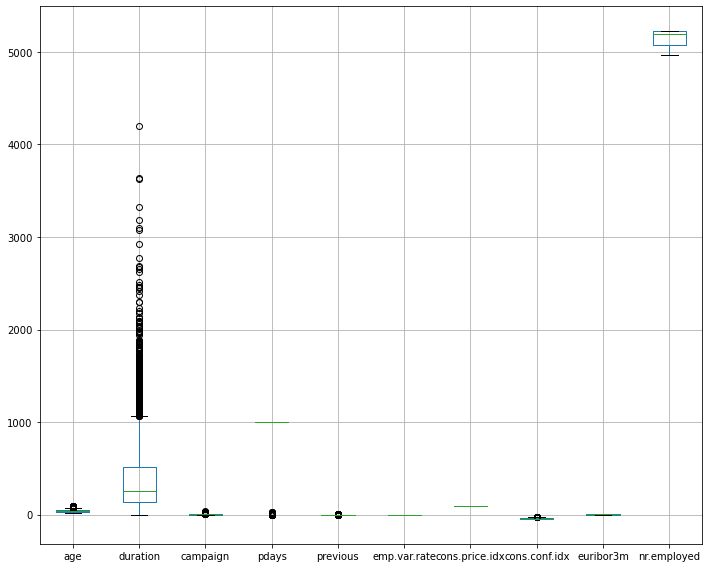

In [100]:
plt.figure(figsize = (10,8))
X.boxplot()

plt.tight_layout()
plt.show()

In class we used IQR Technique

Q1 = df_bank.quantile(0.25)
Q3 = df_bank.quantile(0.75)
IQR = Q3 - Q1

df_bank = df_bank[~((df_bank < (Q1 - 1.5 * IQR)) | (df_bank > (Q3 + 1.5 * IQR))).any(axis=1)]
df_bank = df_bank.reset_index(drop=True)
df_bank.shape


In [107]:
# Z- score technique

In [72]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [110]:
df["y"] = df["y"].map({"yes":1, "no":0})

In [103]:
df_z = np.abs(ss.fit_transform(df[["duration"]]))


In [109]:
outliers = df[df_z > 3]

df1 =  df[df_z < 3]
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [105]:
df1.shape

(9475, 11)

In [106]:
df.shape

(9640, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
X = df1.drop("y", axis =1)
y = df1["y"].map({"yes": 1, "no":0 })

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
data = df1.replace("unknown", np.nan)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
data.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
from sklearn.feature_selection import RFE, mutual_info_classif

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

In [75]:
# rfe can not work on knn

In [119]:
ftr = mutual_info_classif(X,y)

ftr_df = pd.DataFrame(ftr, index = X.columns, columns = ["IMP"])

ftr_df.sort_values(by = "IMP", ascending = False)

,IMP
duration,0.182089
euribor3m,0.170371
cons.price.idx,0.167980
cons.conf.idx,0.167854
nr.employed,0.149757
emp.var.rate,0.132435
pdays,0.067784
previous,0.031601
age,0.023635
campaign,0.014285


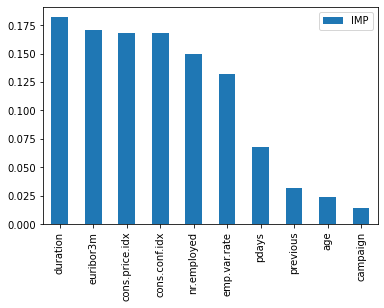

In [120]:
ftr_df.sort_values(by = "IMP", ascending = False).plot(kind = "bar")
plt.show()

In [121]:
from sklearn.feature_selection import SelectKBest

In [122]:
best_cols =  SelectKBest(mutual_info_classif, k = 7)
best_cols.fit(X,y)

X.columns[best_cols.get_support()]

Index(['duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [123]:
X_new = X[X.columns[best_cols.get_support()]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 720x576 with 0 Axes>

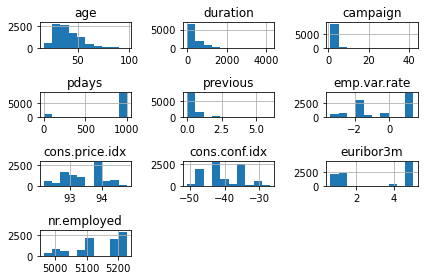

In [53]:
plt.figure(figsize = (10,8))
X.hist()
plt.tight_layout()
plt.show()

In [ ]:
X.skew()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

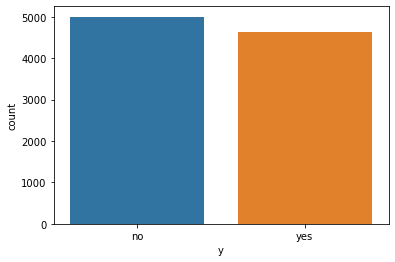

In [58]:
sns.countplot(df["y"])
plt.show()

In [59]:
# Data is balanced

df["y"].value_counts()

no     5000
yes    4640
Name: y, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
X1 = ss.fit_transform(X_new)
X1[:2]

array([[-0.50727495,  0.34790017,  0.91377939,  0.80775967,  0.72296965,
         0.98924531,  0.62667167],
       [ 1.14581607,  0.34790017,  1.08831358,  0.68750463, -0.4583504 ,
         1.04329654,  1.0558885 ]])

<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [127]:
x_train,x_test, y_train,y_test = train_test_split(X1, y, random_state=10, test_size=0.3)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [140]:
from matplotlib.colors import ListedColormap

In [144]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = ListedColormap(['lightskyblue']), 
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()


#### Define a function to plot the ROC curve.

In [166]:
def roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.title('ROC curve for Bank Client Data', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.grid(True)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
knn = KNeighborsClassifier(n_neighbors= 3, p=2)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [134]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.858248329229687

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

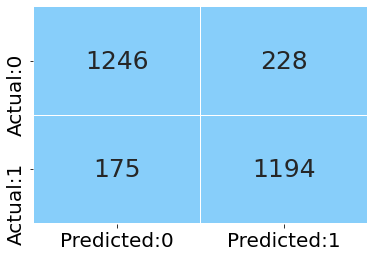

In [145]:
plot_confusion_matrix(knn, x_test)

In [146]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1421
           1       0.87      0.84      0.86      1422

    accuracy                           0.86      2843
   macro avg       0.86      0.86      0.86      2843
weighted avg       0.86      0.86      0.86      2843



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [148]:
knn1 = KNeighborsClassifier()

knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [150]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {"n_neighbors": np.arange(1, 25, 2),
         "metric" : ['hamming','euclidean','manhattan','Chebyshev']}

gsearch = GridSearchCV(knn1, param_grid= param, cv=3)
gsearch.fit(x_train,y_train)

In [157]:
gsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 23}

In [158]:
# Optimal values:
# Metrics - euclidean
# K - 23

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
knn2 = KNeighborsClassifier(n_neighbors= 23, p =2, metric= "euclidean")
knn2.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [162]:
y_pred = knn2.predict(x_test)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1474
           1       0.84      0.93      0.88      1369

    accuracy                           0.88      2843
   macro avg       0.88      0.88      0.88      2843
weighted avg       0.88      0.88      0.88      2843



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

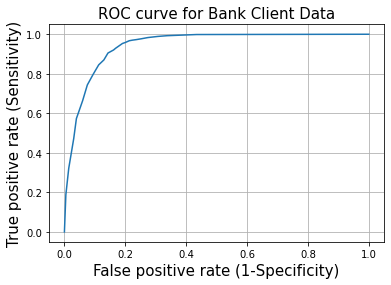

In [167]:
roc_cu = roc(knn2, x_test)

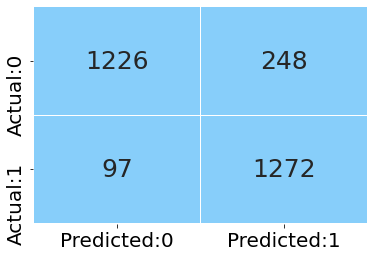

In [168]:
cm = plot_confusion_matrix(knn2, x_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [184]:
obs = pd.DataFrame({"Y_test": y_test, 
                   "Y_pred": y_pred})

a = len(obs[obs["Y_test"] == obs["Y_pred"]])
b = obs.shape[0]
c = b - a

correct = (a/b)*100
print("Correctly Classified observations Precentage: ", correct)

misclass = (c/b)* 100
print("Missclassified observations precentage", misclass)

Correctly Classified observations Precentage:  87.86493141048189
Missclassified observations precentage 12.135068589518115


In [206]:
# We can also use consfusion metrix

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [203]:
accuracy = []
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors= k, p=2)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))

In [204]:
accuracy

[0.8294055575096729,
 0.858248329229687,
 0.8698557861413999,
 0.8705592683784734,
 0.8751319029194513,
 0.8772423496306718,
 0.8751319029194513,
 0.8807597608160393,
 0.8804080196975026,
 0.8797045374604291,
 0.8804080196975026,
 0.8786493141048188]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

In [215]:
k = np.arange(1, 25, 2)

Text(0, 0.5, 'Accuracy')

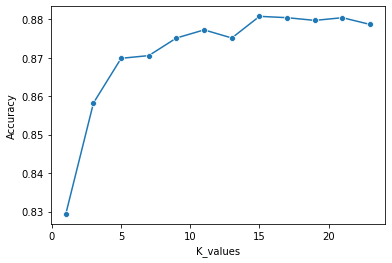

In [222]:
sns.lineplot(k, accuracy, marker = "o")
plt.xlabel("K_values")
plt.ylabel("Accuracy")


In [223]:
# after K=15 our accuracy is stable, so optimal k = 15

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [224]:
from sklearn.naive_bayes import GaussianNB

In [225]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [228]:
y_pred = gnb.predict(x_test)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1474
           1       0.83      0.79      0.81      1369

    accuracy                           0.82      2843
   macro avg       0.82      0.82      0.82      2843
weighted avg       0.82      0.82      0.82      2843



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

AUC_score 0.8212565401956285


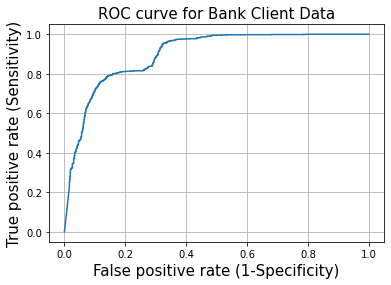

In [232]:
auc_score = roc_auc_score(y_test,y_pred)

print("AUC_score", auc_score)

roc_curve_ = roc(gnb, x_test)

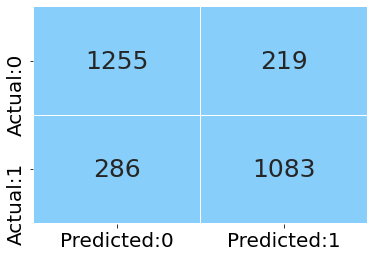

In [230]:
conf_matrix = plot_confusion_matrix(gnb, x_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [238]:
gnb1 = GaussianNB()
gnb1.fit(x_train,y_train)

GaussianNB()

In [239]:
from sklearn.model_selection import cross_val_score

In [241]:
score = cross_val_score(gnb1, x_train,y_train, cv=10, scoring = "accuracy")

In [245]:
print("Average Accuracy: ", np.mean(score))

Average Accuracy:  0.8110709807556015
